In [1]:
################################################################################
# perform network analysis for bipartite network AD-ADR (local PRR) using NetworkX

# author: Ximena Fernandez
# mail: xfdzciencias@gmail.com

################################################################################

In [4]:
################################################################################
# import modules 
################################################################################

import pandas as pd
import networkx as nx
import numpy as np
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

In [5]:
################################################################################
# data extraction and network construction
################################################################################

In [7]:
## read network construction file 
df = pd.read_csv('./data/local_ad_ars_network.csv')
display(df)

,ars,ad,value
0,5-hydroxyindolacetic acid increased,amitriptyline,22.923896
1,abortion spontaneous incomplete,amitriptyline,11.461948
2,acalculia,amitriptyline,11.461948
3,acne conglobata,amitriptyline,11.461948
4,acoustic stimulation tests abnormal,amitriptyline,5.960213
...,...,...,...
5467,vulvovaginal inflammation,venlafaxine,8.816065
5468,waxy flexibility,venlafaxine,22.040164
5469,wrong drug,venlafaxine,13.224098
5470,xanthopsia,venlafaxine,5.877377


In [8]:
## create a graph
B = nx.Graph()

## create the list of the set of nodes from the edge-list
ads = set(df['ars'])
adrs = set(df['ad'])

## add top and bottom nodes
B.add_nodes_from(ads, bipartite=0)
B.add_nodes_from(adrs, bipartite=1)

## add edges with corresponding weight from df
for _, row in df.iterrows():
    B.add_edge(row['ars'], row['ad'], weight=row['value'])

print(B)

Graph with 3903 nodes and 5472 edges


In [9]:
################################################################################
# large scale features
################################################################################

In [10]:
## count the total number of edges
total_edges = B.number_of_edges()

## get the sets of nodes for each bipartite class manually
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 1}

## compute average edge weight using numpy
edge_weights = np.array([d['weight'] for _, _, d in B.edges(data=True)])
average_edge_weight = edge_weights.mean() if edge_weights.size > 0 else 0  

## print results
print(f"Total number of edges: {total_edges}")
print(f"Average edge weight: {average_edge_weight:.4f}")
print(f"Total number of ADs: {len(top_nodes)}")
print(f"Total number of ADRs: {len(bottom_nodes)}")


Total number of edges: 5472
Average edge weight: 30.6946
Total number of ADs: 3878
Total number of ADRs: 25


In [11]:
## calculate bipartite network density
density = nx.bipartite.density(B, bottom_nodes)

print(f"Network density: {density:.4f}")

Network density: 0.0564


In [12]:
## check connectedness
connect = nx.is_connected(B)
print(f"Connectedness: {connect}")

## find the number of connected components
num_components = nx.number_connected_components(B)
print(f"Number of connected components: {num_components}")

## find giant component
largest_cc = max(nx.connected_components(B), key=len)
print(f"Giant component: {len(largest_cc)}")

Connectedness: False
Number of connected components: 2
Giant component: 3901


In [13]:
## compute degree sequences for both sets in the bipartite network
ads_degrees, adrs_degrees = nx.bipartite.degrees(B, bottom_nodes)  # nodes as keys, degrees as values

## extract degree sequences
ads_degree_list = list(dict(ads_degrees).values()) 
adrs_degree_list = list(dict(adrs_degrees).values()) 

## compute normal degree distributions 
ads_degree_dist = OrderedDict(sorted(Counter(ads_degree_list).items()))
adrs_degree_dist = OrderedDict(sorted(Counter(adrs_degree_list).items()))

## compute cumulative degree distributions (CDF)
ads_degree_values = np.array(list(ads_degree_dist.keys()))  
adrs_degree_values = np.array(list(adrs_degree_dist.keys()))

ads_cdf = 1 - np.cumsum(list(ads_degree_dist.values())) / len(ads_degree_list)
adrs_cdf = 1 - np.cumsum(list(adrs_degree_dist.values())) / len(adrs_degree_list)

## compute average degree for ADs
avg_degree_ads = sum(ads_degree_list) / len(ads_degree_list)

## compute average degree for ADRs
avg_degree_adrs = sum(adrs_degree_list) / len(adrs_degree_list)

## print results
print(f"Average degree of ADs: {avg_degree_ads:.3f}")
print(f"Average degree of ADRs: {avg_degree_adrs:.3f}")

Average degree of ADs: 1.411
Average degree of ADRs: 218.880


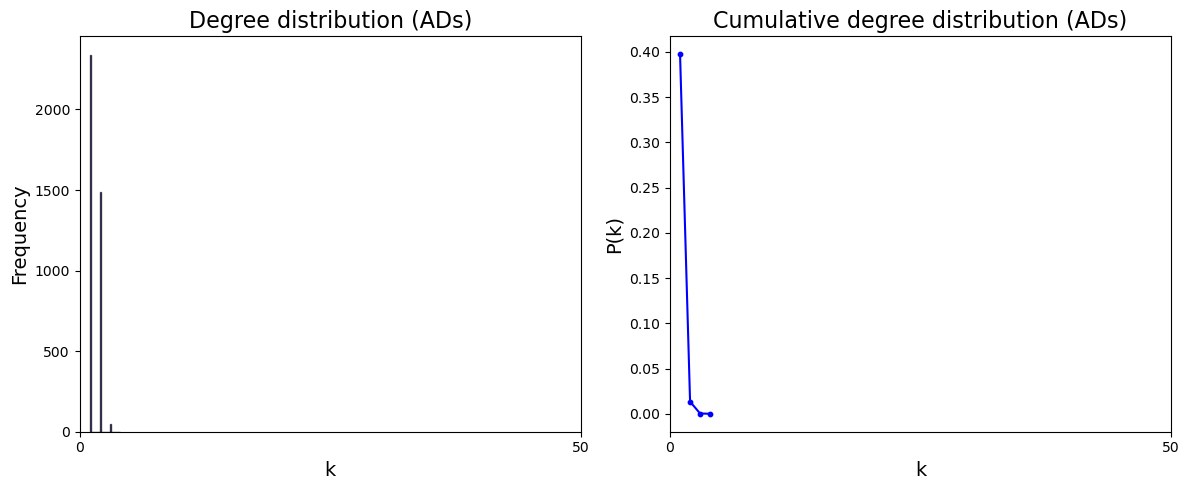

In [14]:
## plot normal degree distribution and CDF for antidepressants

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal degree distribution (histogram)
ax[0].hist(ads_degree_list, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("k", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Degree distribution (ADs)", fontsize=16)
ax[0].set_xticks(np.arange(0, max(ads_degree_list) + 50, 50))

## plot cumulative degree distribution (CDF)
ax[1].scatter(ads_degree_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_degree_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("k", fontsize=14)
ax[1].set_ylabel("P(k)", fontsize=14)
ax[1].set_title("Cumulative degree distribution (ADs)", fontsize=16)
ax[1].set_xticks(np.arange(0, max(ads_degree_values) + 50, 50))

## adjust layout and show plot
plt.tight_layout()
plt.show()

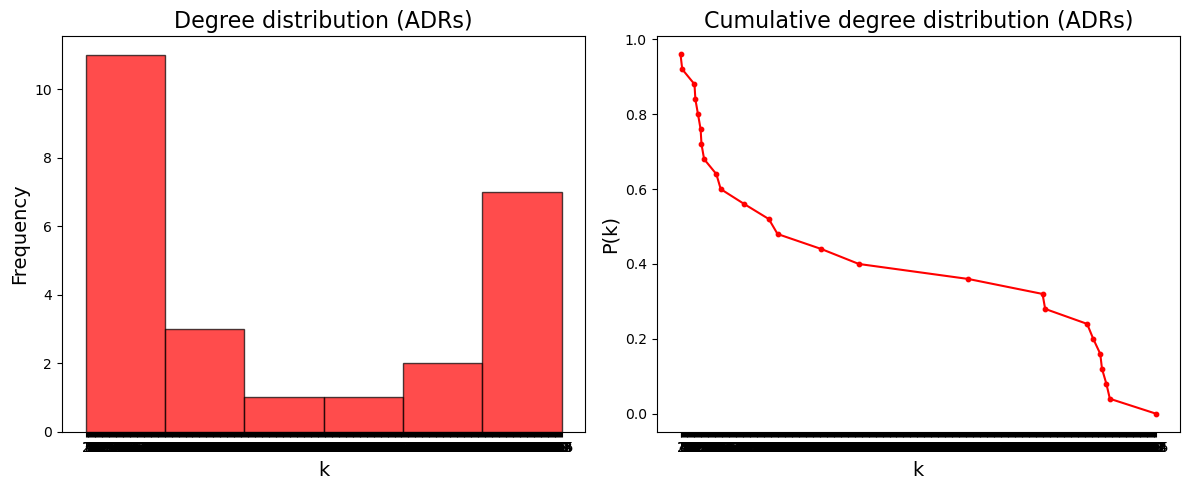

In [15]:
## plot normal degree distribution and CDF for adverse reactions

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal degree distribution (histogram)
ax[0].hist(adrs_degree_list, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("k", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Degree distribution (ADRs)", fontsize=16)
ax[0].set_xticks(np.arange(1, max(adrs_degree_list) + 1, 1))

## plot cumulative degree distribution (CDF)
ax[1].scatter(adrs_degree_values, adrs_cdf, color="red", s=10)
ax[1].plot(adrs_degree_values, adrs_cdf, linestyle="-", color="red")
ax[1].set_xlabel("k", fontsize=14)
ax[1].set_ylabel("P(k)", fontsize=14)
ax[1].set_title("Cumulative degree distribution (ADRs)", fontsize=16)
ax[1].set_xticks(np.arange(1, max(adrs_degree_values) + 1, 1)) 

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [16]:
################################################################################
# network local scale features
################################################################################

In [17]:
## compute bipartite clustering coefficient for all nodes
clustering_coeffs = nx.bipartite.clustering(B)

## extract clustering coefficients for ADs and ADRs
ads_clustering = [clustering_coeffs[n] for n in top_nodes]
adrs_clustering = [clustering_coeffs[n] for n in bottom_nodes]

## compute average clustering coefficient for each class
avg_clustering = {"ADs": np.mean(ads_clustering), "ADRs": np.mean(adrs_clustering)}

## print results
print(f"Average clustering coefficient of ADs: {avg_clustering['ADs']:.4f}")
print(f"Average clustering coefficient of ADRs: {avg_clustering['ADRs']:.4f}")

## compute clustering coefficient distributions
ads_clustering_dist = Counter(ads_clustering)  
adrs_clustering_dist = Counter(adrs_clustering)

## compute cumulative distributions
ads_clustering_values = np.array(sorted(ads_clustering_dist.keys()))
adrs_clustering_values = np.array(sorted(adrs_clustering_dist.keys()))
ads_cdf = np.cumsum(list(ads_clustering_dist.values())) / len(ads_clustering)
adrs_cdf = np.cumsum(list(adrs_clustering_dist.values())) / len(adrs_clustering)

Average clustering coefficient of ADs: 0.5947
Average clustering coefficient of ADRs: 0.0121


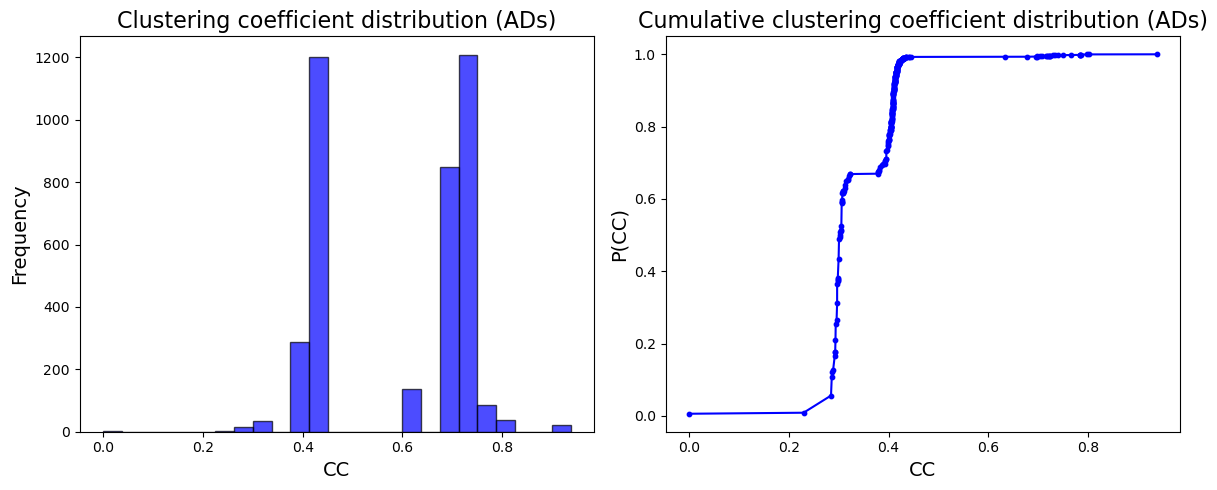

In [18]:
## plot normal clustering coefficient distribution and CDF for ADs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal clustering coefficient distribution (histogram)
ax[0].hist(ads_clustering, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("CC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Clustering coefficient distribution (ADs)", fontsize=16)

## plot cumulative clustering coefficient distribution (CDF)
ax[1].scatter(ads_clustering_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_clustering_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("CC", fontsize=14)
ax[1].set_ylabel("P(CC)", fontsize=14)
ax[1].set_title("Cumulative clustering coefficient distribution (ADs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

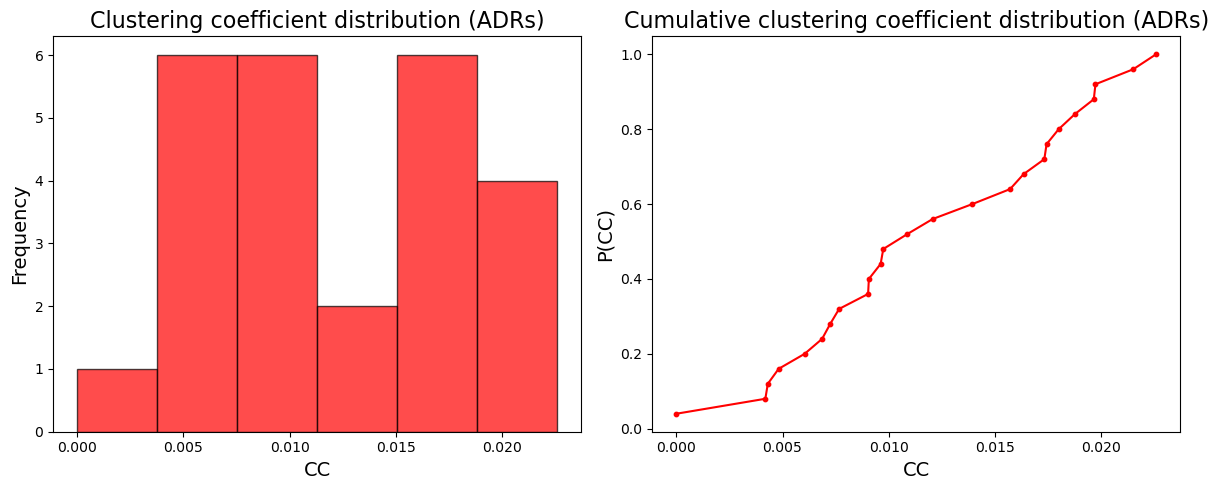

In [19]:
## plot normal clustering coefficient distribution and CDF for ADRs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal clustering coefficient distribution (histogram)
ax[0].hist(adrs_clustering, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("CC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Clustering coefficient distribution (ADRs)", fontsize=16)

## plot cumulative clustering coefficient distribution (CDF)
ax[1].scatter(adrs_clustering_values, adrs_cdf, color="red", s=10)  # smaller markers
ax[1].plot(adrs_clustering_values, adrs_cdf, linestyle="-", color="red")
ax[1].set_xlabel("CC", fontsize=14)
ax[1].set_ylabel("P(CC)", fontsize=14)
ax[1].set_title("Cumulative clustering coefficient distribution (ADRs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [20]:
## compute bipartite redundancy coefficient for all nodes
redundancy_coeffs = {}

for node in B.nodes():
    if len(B[node]) < 2:  # if the node has fewer than 2 neighbors
        redundancy_coeffs[node] = 0  # if the node has no neighbors, then RC = 0
    else:
        redundancy_coeffs[node] = nx.bipartite.node_redundancy(B, nodes=[node])[node]

## extract redundancy coefficients for ADs and ADRs
ads_redundancy = [redundancy_coeffs[n] for n in top_nodes]
adrs_redundancy = [redundancy_coeffs[n] for n in bottom_nodes]

## compute average redundancy coefficient for each class
avg_redundancy = {"ADs": np.mean(ads_redundancy), "ADRs": np.mean(adrs_redundancy)}

## print results
print(f"Average redundancy coefficient of ADs: {avg_redundancy['ADs']:.4f}")
print(f"Average redundancy coefficient of ADRs: {avg_redundancy['ADRs']:.4f}")

## compute redundancy coefficient distributions
ads_redundancy_dist = Counter(ads_redundancy)  
adrs_redundancy_dist = Counter(adrs_redundancy)

## compute cumulative distributions
ads_redundancy_values = np.array(sorted(ads_redundancy_dist.keys()))
adrs_redundancy_values = np.array(sorted(adrs_redundancy_dist.keys()))
ads_cdf = np.cumsum(list(ads_redundancy_dist.values())) / len(ads_redundancy)
adrs_cdf = np.cumsum(list(adrs_redundancy_dist.values())) / len(adrs_redundancy)

Average redundancy coefficient of ADs: 0.3877
Average redundancy coefficient of ADRs: 0.0224


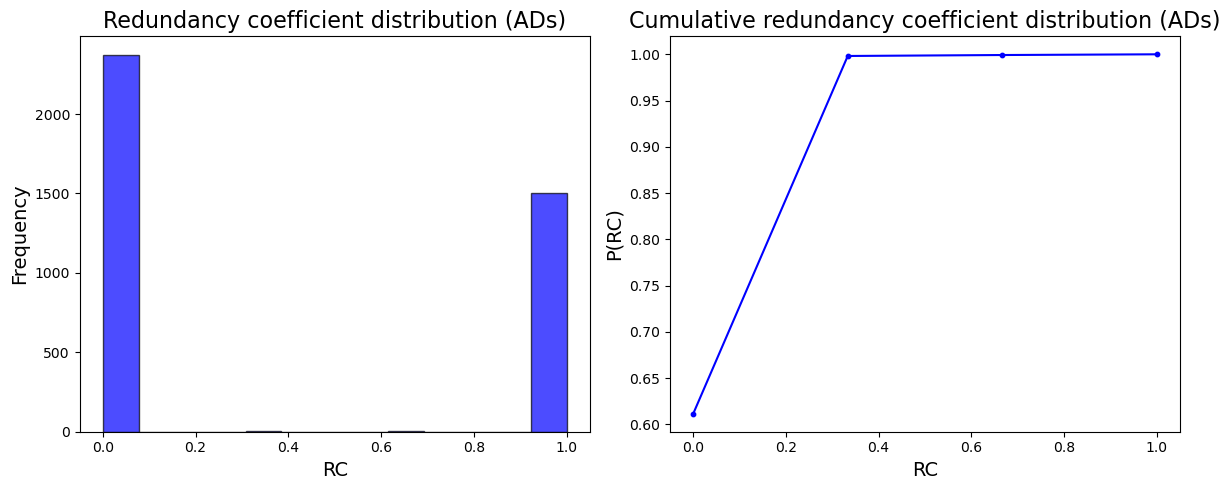

In [21]:
## plot normal redundancy coefficient distribution and CDF for ADs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal redundancy coefficient distribution (histogram)
ax[0].hist(ads_redundancy, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("RC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Redundancy coefficient distribution (ADs)", fontsize=16)

## plot cumulative redundancy coefficient distribution (CDF)
ax[1].scatter(ads_redundancy_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_redundancy_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("RC", fontsize=14)
ax[1].set_ylabel("P(RC)", fontsize=14)
ax[1].set_title("Cumulative redundancy coefficient distribution (ADs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

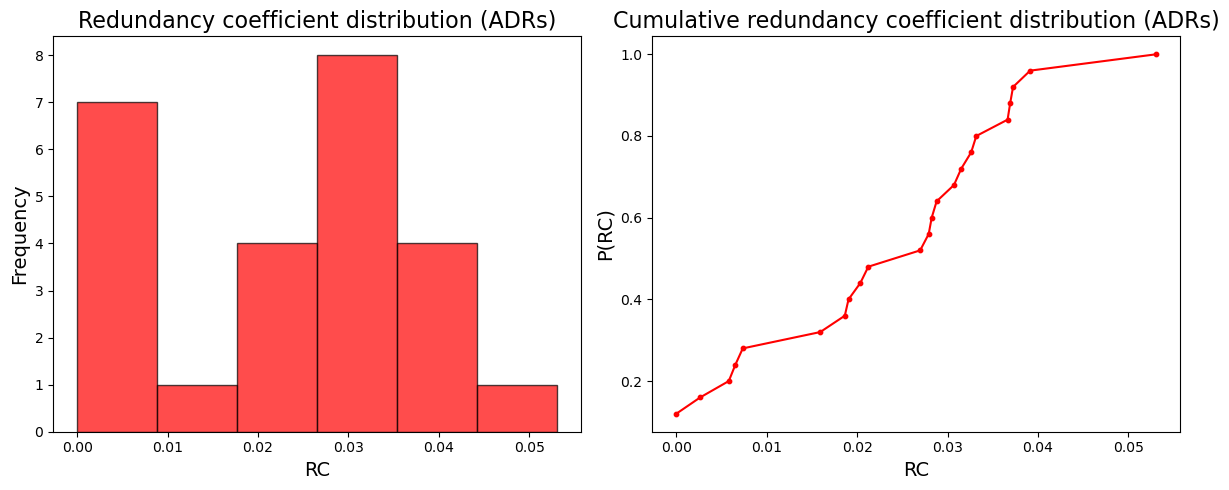

In [22]:
## plot normal redundancy coefficient distribution and CDF for ADRs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal redundancy coefficient distribution (histogram)
ax[0].hist(adrs_redundancy, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("RC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Redundancy coefficient distribution (ADRs)", fontsize=16)

## plot cumulative redundancy coefficient distribution (CDF)
ax[1].scatter(adrs_redundancy_values, adrs_cdf, color="red", s=10)  # smaller markers
ax[1].plot(adrs_redundancy_values, adrs_cdf, linestyle="-", color="red")
ax[1].set_xlabel("RC", fontsize=14)
ax[1].set_ylabel("P(RC)", fontsize=14)
ax[1].set_title("Cumulative redundancy coefficient distribution (ADRs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [23]:
################################################################################
# network centrality measures
################################################################################

In [24]:
## compute bipartite centralities separately for each class
ads_degree_centrality = nx.bipartite.degree_centrality(B, top_nodes)
adrs_degree_centrality = nx.bipartite.degree_centrality(B, bottom_nodes)

ads_closeness_centrality = nx.bipartite.closeness_centrality(B, nodes=top_nodes)
adrs_closeness_centrality = nx.bipartite.closeness_centrality(B, nodes=bottom_nodes)

ads_betweenness_centrality = nx.bipartite.betweenness_centrality(B, top_nodes)
adrs_betweenness_centrality = nx.bipartite.betweenness_centrality(B, bottom_nodes)

## compute average centrality for each class directly from the dict values
avg_centrality_ads = {"degree": np.mean(list(ads_degree_centrality.values())), "closeness": np.mean(list(ads_closeness_centrality.values())), "betweenness": np.mean(list(ads_betweenness_centrality.values()))}

avg_centrality_adrs = {"degree": np.mean(list(adrs_degree_centrality.values())), "closeness": np.mean(list(adrs_closeness_centrality.values())), "betweenness": np.mean(list(adrs_betweenness_centrality.values()))}

## print results
print(f"Average degree centrality of ADs: {avg_centrality_ads['degree']:.4f}")
print(f"Average closeness centrality of ADs: {avg_centrality_ads['closeness']:.4f}")
print(f"Average betweenness centrality of ADs: {avg_centrality_ads['betweenness']:.4f}")

print(f"Average degree centrality of ADRs: {avg_centrality_adrs['degree']:.4f}")
print(f"Average closeness centrality of ADRs: {avg_centrality_adrs['closeness']:.4f}")
print(f"Average betweenness centrality of ADRs: {avg_centrality_adrs['betweenness']:.4f}")

Average degree centrality of ADs: 0.0564
Average closeness centrality of ADs: 0.5307
Average betweenness centrality of ADs: 0.0007
Average degree centrality of ADRs: 0.0564
Average closeness centrality of ADRs: 0.5307
Average betweenness centrality of ADRs: 0.0007
